In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
path = "./archive/Bengaluru_House_Data.csv"
df_raw = pd.read_csv(path)

df_raw.shape

(13320, 9)

In [33]:
df_raw.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [34]:
df_raw.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [35]:
df = df_raw.copy()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [37]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [38]:
def value_count(df):
    for var in df.columns:
        print(df[var].value_counts())
        print("-----------------------------")
        
value_count(df)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
-----------------------------
availability
Ready To Move           10581
18-Dec                    307
18-May                    295
18-Apr                    271
18-Aug                    200
19-Dec                    185
18-Jul                    143
18-Mar                    131
18-Jun                     99
20-Dec                     98
21-Dec                     93
19-Mar                     88
18-Feb                     62
18-Nov                     47
18-Jan                     43
18-Sep                     41
19-Jun                     40
18-Oct                     39
19-Jan                     39
19-Jul                     36
17-Dec                     29
20-Jan                     24
17-Oct                     21
19-Sep                     21
22-Jun                     19
19-Aug                     18
21-Jun                   

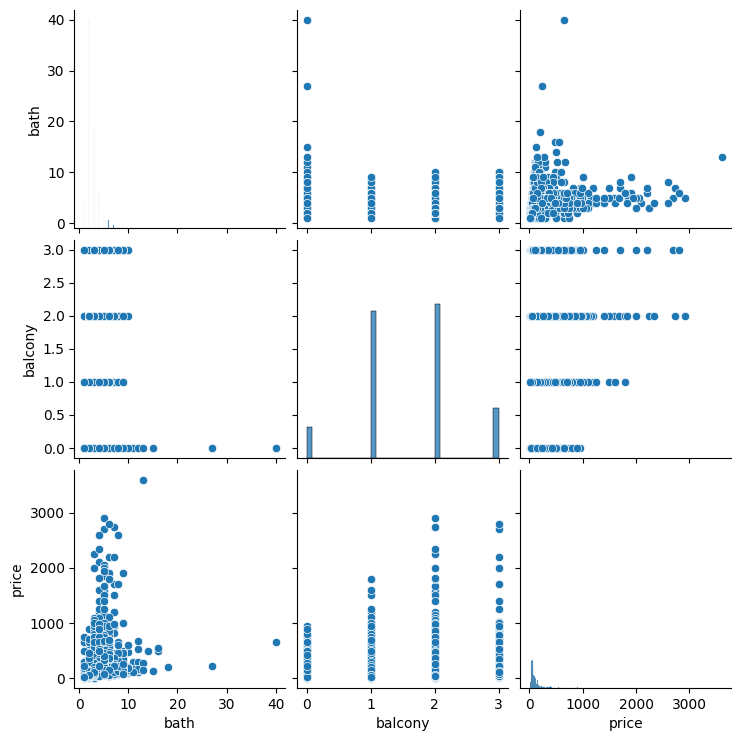

In [39]:
sns.pairplot(df)

<Axes: >

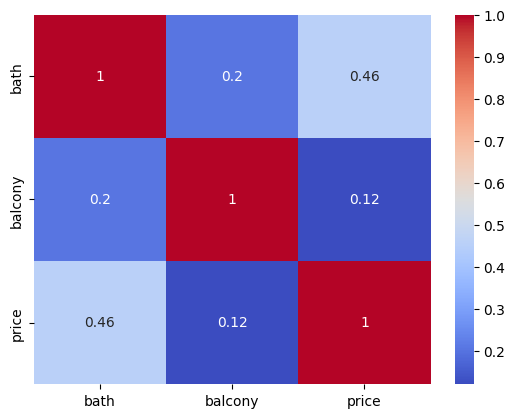

In [40]:
num_vars = ["bath", "balcony", "price"]
sns.heatmap(df[num_vars].corr(), cmap="coolwarm", annot=True)

In [41]:
df.isnull().mean()*100 #kiểm tra độ khuyết của các trường

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [42]:
#loại bỏ các trường bị khuyết quá nhiều
df2 = df.drop('society', axis = "columns")
df2.shape

(13320, 8)

In [43]:
# thay các giá trị null bằng trung bình các giá trị còn lại
df2['balcony']= df2['balcony'].fillna(df2['balcony'].mean())
df2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [44]:
#xóa các hàng k có giá trị (NaN)
df3 = df2.dropna()
df3.shape

(13246, 8)

In [45]:
df3.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [46]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [47]:
df3['total_sqft'].value_counts

<bound method IndexOpsMixin.value_counts of 0                     1056
1                     2600
2                     1440
3                     1521
4                     1200
5                     1170
6                     2732
7                     3300
8                     1310
9                     1020
10                    1800
11                    2785
12                    1000
13                    1100
14                    2250
15                    1175
16                    1180
17                    1540
18                    2770
19                    1100
20                     600
21                    1755
22                    2800
23                    1767
24                     510
25                    1250
26                     660
27                    1610
28                    1151
29                    1025
30             2100 - 2850
31                    1075
32                    1760
33                    1693
34                    1925
35         

In [48]:
total_sqft_float = []
for str_val in df3['total_sqft']:
    try:
        total_sqft_float.append(float(str_val))
    except:
        try:
            temp = []
            temp = str_val.split('-')
            total_sqft_float.append((float(temp[0])+ float(temp[1]))/2)
        except:
            total_sqft_float.append(np.nan)
            
df4 =df3.reset_index(drop=True)

In [49]:
df5 = df4.join(pd.DataFrame({'total_sqft_float' :total_sqft_float }))
df5.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_float
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0


In [50]:
df5.isnull().sum()

area_type            0
availability         0
location             0
size                 0
total_sqft           0
bath                 0
balcony              0
price                0
total_sqft_float    46
dtype: int64